# Pressure Traverse- Revised Beggs and Brill Correlation

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import psapy.FluidProps
import psapy.BeggsandBrill as BB

Input Data

In [2]:
oil_rate= 100
water_rate = 50
gor = 300
gas_grav = 0.65
oil_grav = 35
wtr_grav = 1.07
diameter=2.441
angle=90.0
thp= 150.0
tht=100.0
twf=150.0
depth = 5000
sample_size =51

def temp_gradient(t0,t1, depth):
    if depth==0:
        return 0
    else:
        return abs(t0-t1)/depth    

t_grad = temp_gradient(tht,twf, depth)
t_grad

0.01

In [4]:
depths = np.linspace(0, depth, sample_size)
depths

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
       2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
       3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
       4500., 4600., 4700., 4800., 4900., 5000.])

In [5]:
temps = tht + t_grad * depths
temps

array([100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150.])

In [10]:
#def Pgrad(P, T, oil_rate, wtr_rate, Gor, gas_grav, oil_grav, wtr_grav, d, angle):


def pressure_traverse(oil_rate):
    p=[]
    dpdz=[]
    for i in range(len(depths)):

        if i==0:
            p.append(thp)
        else:
            dz = (depths[i]-depths[i-1])
            pressure = p[i-1]+dz*dpdz[i-1]
            p.append(pressure)

        dpdz_step = BB.Pgrad(p[i], temps[i], oil_rate, water_rate, gor, gas_grav, oil_grav, wtr_grav, diameter, angle) 
        dpdz.append(dpdz_step)
        
    return p, dpdz

p, dpdz =pressure_traverse(oil_rate)
p[-1]


2313.7335679949833

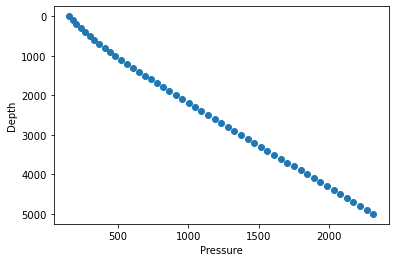

In [11]:
scatter =plt.scatter(p, depths)
ax = scatter.axes
ax.invert_yaxis()
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.show()

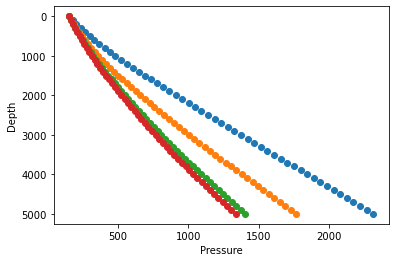

In [12]:
oil_rates=[100,200,300, 500] 
for r in oil_rates:
    p, dpdz =pressure_traverse(r)
    scatter =plt.scatter(p, depths)
ax = scatter.axes
ax.invert_yaxis()
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.show()